<a href="https://colab.research.google.com/github/EndarMuh/PCVK_Ganjil_2023/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama  : Muhammad Endar Darmawan

Kelas : TI - 3F

Absen : 21

NIM   : 2141720160

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **C. DASAR TEORI**

### **C.1 Konsep Feature Matching**

In [20]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [21]:
def display(img,cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

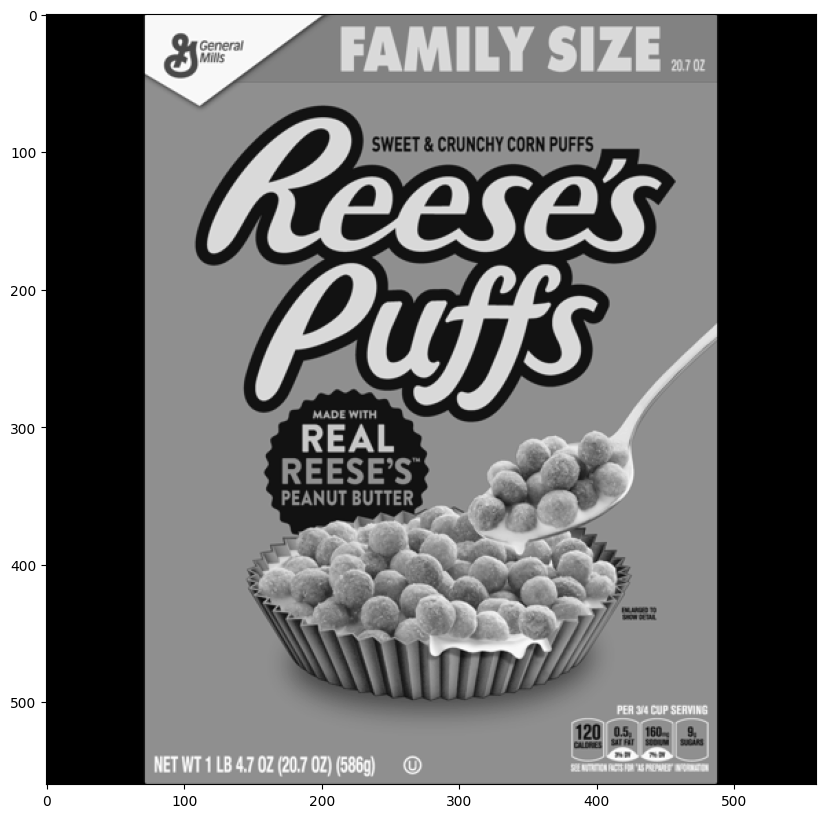

In [23]:
reeses = cv.imread('/content/drive/MyDrive/PCVK_2023/Week12/reeses_puffs.png',0)
display(reeses)

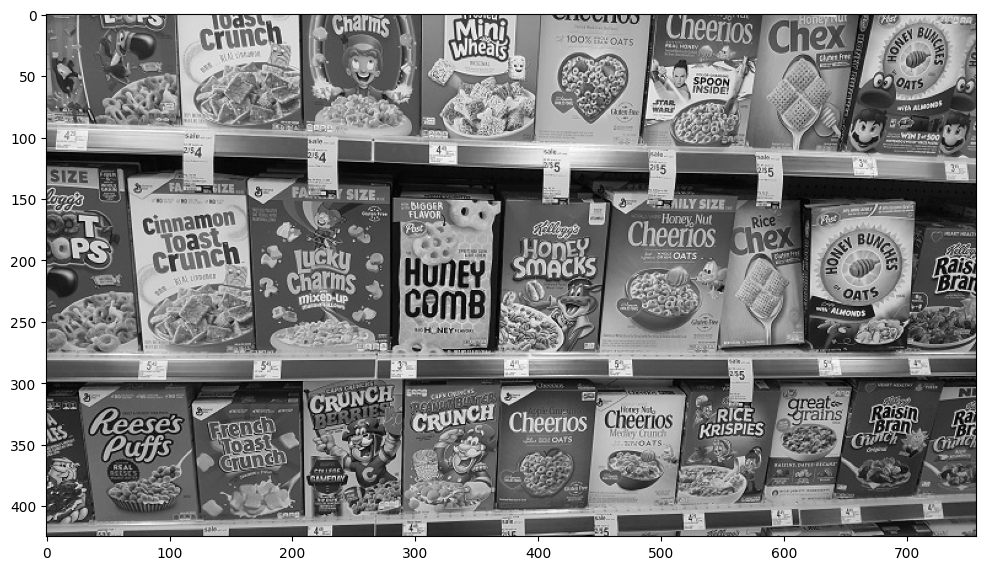

In [24]:
cereals = cv.imread('/content/drive/MyDrive/PCVK_2023/Week12/many_cereals.jpg',0)
display(cereals)

In [25]:
orb = cv.ORB_create()
kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(cereals,None)
bf = cv.BFMatcher(cv.NORM_HAMMING,crossCheck = True)
matches = bf.match(des1,des2)
single_match = matches[0]
single_match.distance

71.0

In [26]:
len(matches)

139

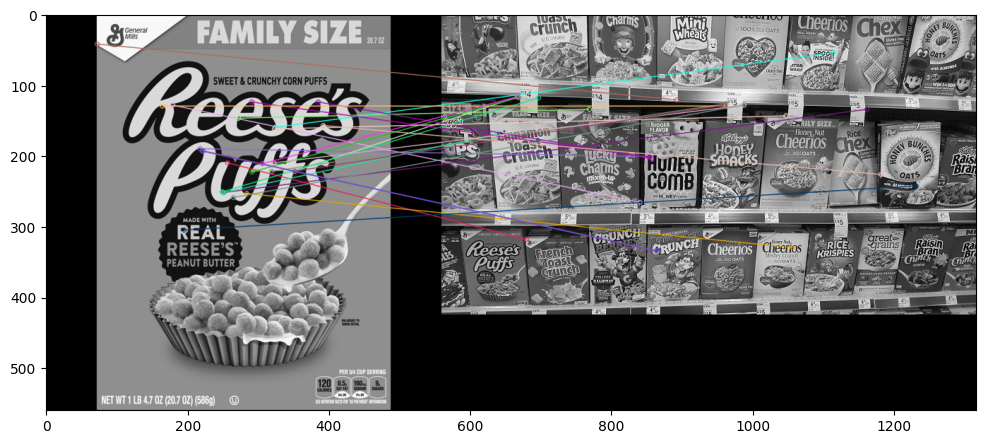

In [27]:
matches = sorted(matches,key=lambda x:x.distance)
reeses_match = cv.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)
display(reeses_match)

In [29]:
!pip install opencv-contrib-python==4.4.0.44

ERROR: Could not find a version that satisfies the requirement opencv-contrib-python==4.4.0.44 (from versions: 3.4.11.45, 3.4.13.47, 3.4.14.51, 3.4.15.55, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.4.0.46, 4.5.1.48, 4.5.2.52, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66, 4.7.0.68, 4.7.0.72, 4.8.0.74, 4.8.0.76, 4.8.1.78)
ERROR: No matching distribution found for opencv-contrib-python==4.4.0.44


In [32]:
sift = cv.xfeatures2d.SIFT_create()
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

good = []

#Makin kecil jarak makin cocok
#ratio match < 75% Match2
for match1,match2 in matches:
  #jika jarak match1 lebih kecil dari jarak 75% match2
  #description disimpan
  if match1.distance < 0.75*match2.distance:
    good.append([match1])

len(good)

79

In [33]:
len(matches)

1501

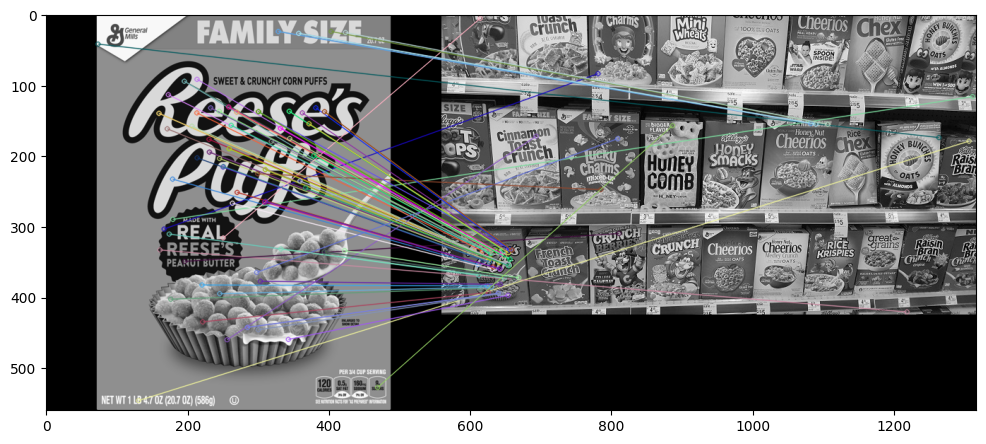

In [34]:
sift_matches = cv.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)
display(sift_matches)

### **C.2 Konsep Face Detection**

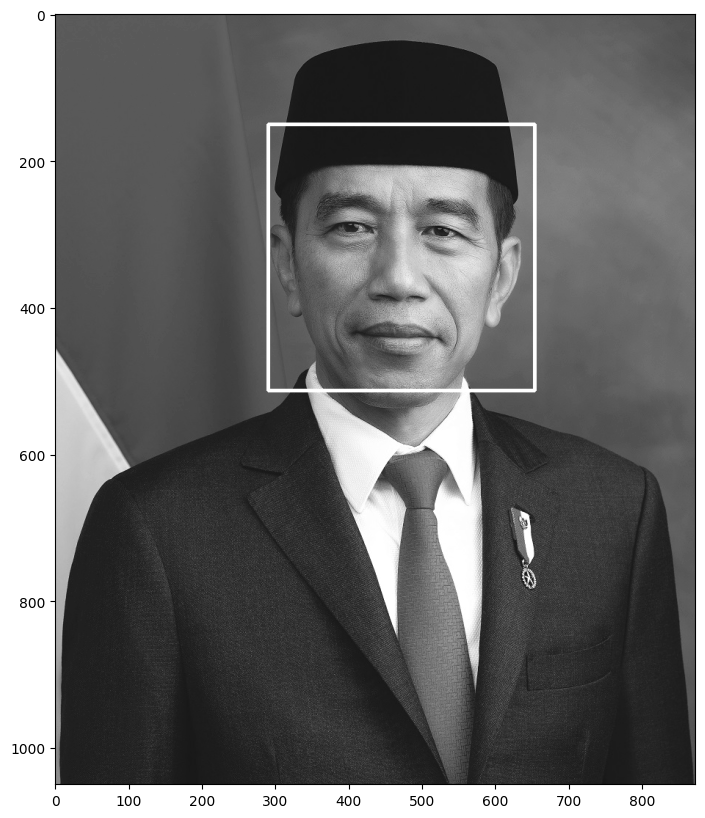

In [28]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK_2023/Week12/haarcascade_frontalface_alt.xml')

jokowi = cv.imread('/content/drive/MyDrive/PCVK_2023/Week12/jokowi.jpg',0)
roi_wajah = cascade_wajah.detectMultiScale(jokowi)
for(x,y,w,h) in roi_wajah:
  cv.rectangle(jokowi, (x,y), (x+w,y+h), (255,255,255),3)
plt.figure(figsize = (10,10))
plt.imshow(jokowi, cmap='gray')

# **D. TUGAS PRAKTIKUM**

**Catatan:** Untuk gambar pada praktikum ini menggunakan gambar pada link berikut:

[Dataset](https://drive.google.com/drive/folders/1d4U8FVnQ0Hq_K1Sy4XJvQsgq12ZjvmgK?usp=shari)

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, buat notebook baru dan beri nama “Week12.ipynb”. Kemudian import  beberapa library dan akses folder yang ada di Drive Anda dengan seperti biasa.

2. Lakukan Face Detection untuk image object lain yang tersedia pada (/images/facedet). Tampilkan seperti pada contoh berikut.

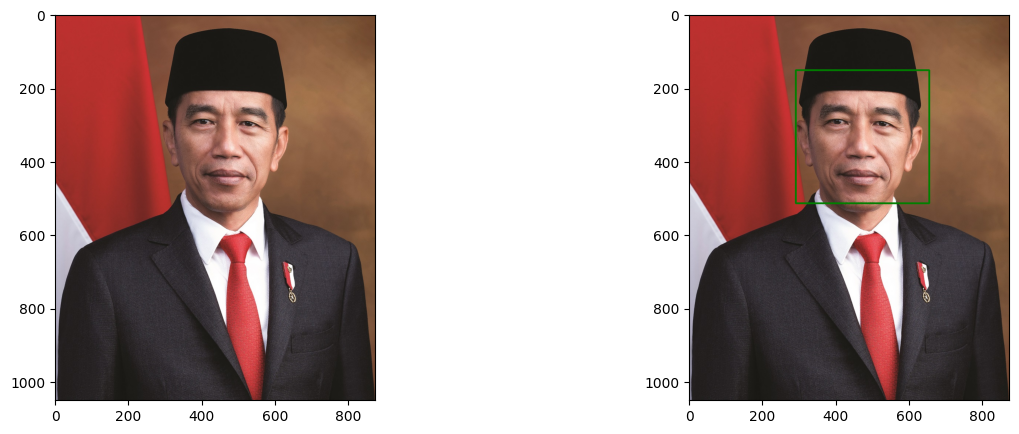

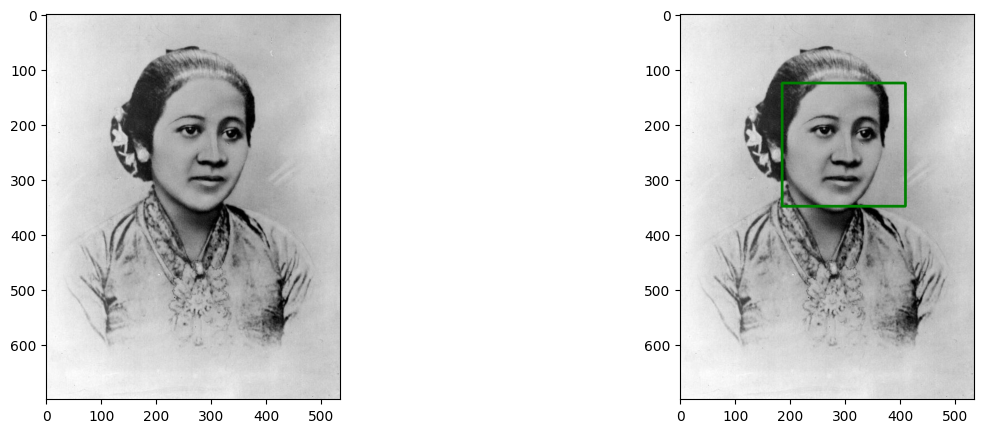

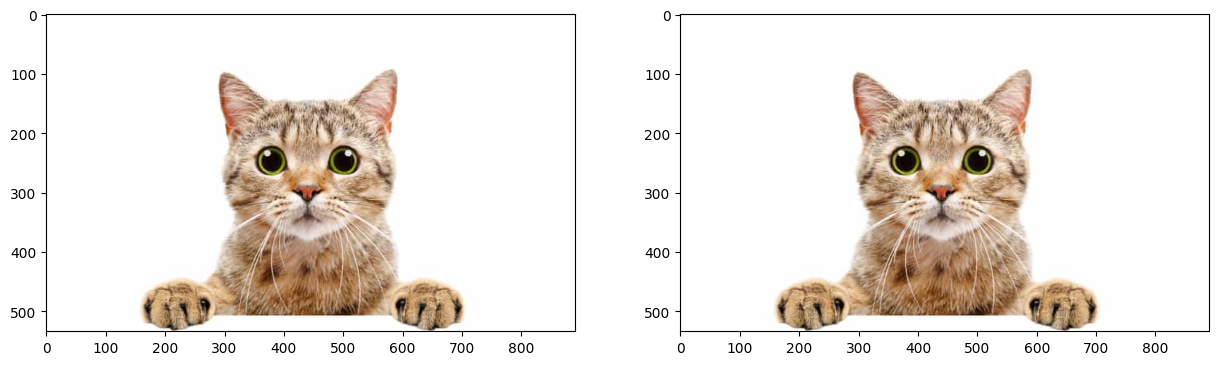

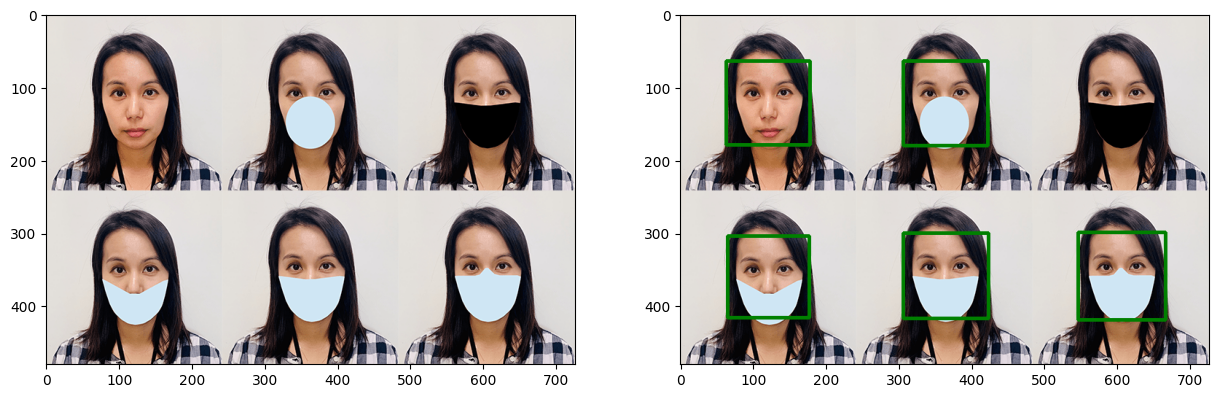

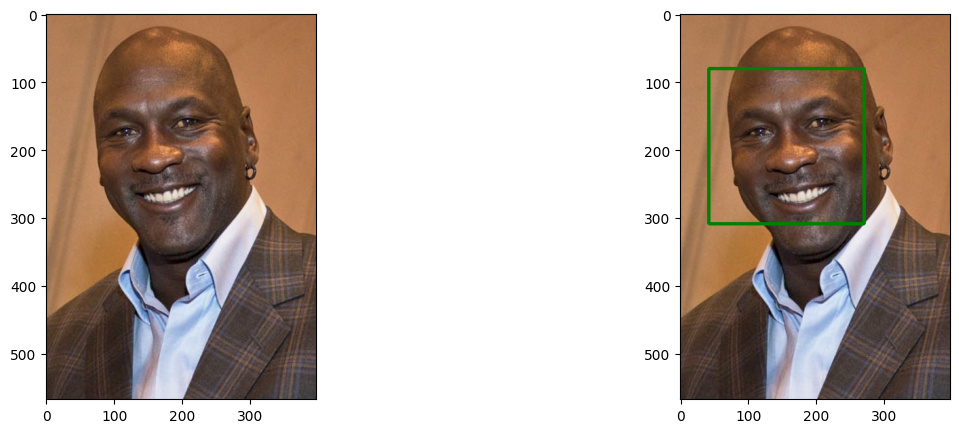

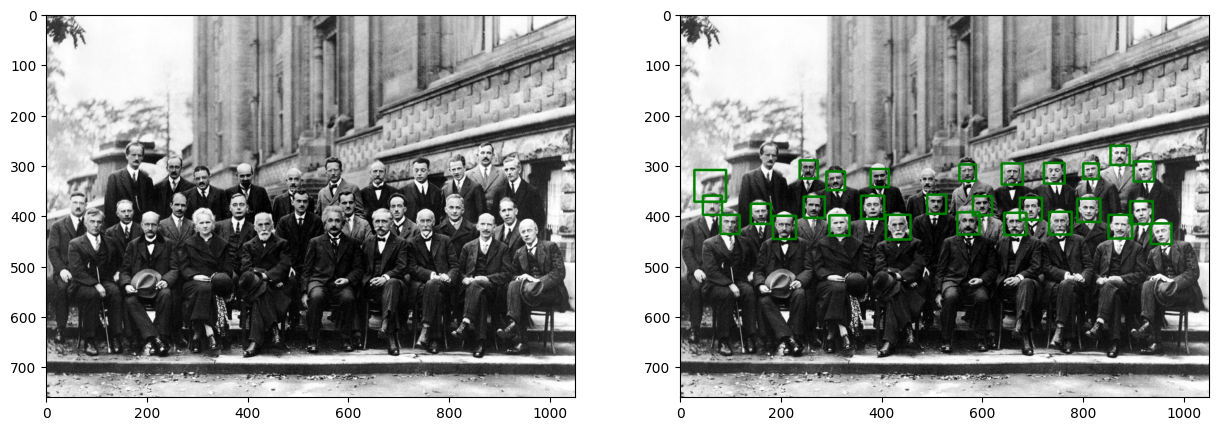

In [47]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK_2023/Week12/new/haarcascade_frontalface_alt.xml')
data = ['/content/drive/MyDrive/PCVK_2023/Week12/new/jokowi.jpg',
        '/content/drive/MyDrive/PCVK_2023/Week12/new/kartini.jpg',
        '/content/drive/MyDrive/PCVK_2023/Week12/new/kucing.jpg',
        '/content/drive/MyDrive/PCVK_2023/Week12/new/mask.png',
        '/content/drive/MyDrive/PCVK_2023/Week12/new/mjordan.jpg',
        '/content/drive/MyDrive/PCVK_2023/Week12/new/solvayconf.jpg'
        ]
for i in data:
  image = cv.imread(i)
  image_ori = cv.imread(i)
  roi_wajah = cascade_wajah.detectMultiScale(image)
  for(x,y,w,h) in roi_wajah:
    cv.rectangle(image,(x,y),(x+w,y+h),(0,128,0),3)
  f, axarr = plt. subplots(1,2,figsize=(15,5))
  plt.subplot(121),plt.imshow(cv.cvtColor(image_ori, cv.COLOR_BGR2RGB))
  axarr[0].imshow(cv.cvtColor(image_ori, cv.COLOR_BGR2RGB))
  plt.subplot(122),plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
  axarr[1].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
  plt.show()

Perhatikan pada hasil face detection diatas. Secara keseluruhan, face detection dapat dilakukan dengan baik, bahkan untuk image berupa gambar bukan foto, wajah bermasker, atau wajah yang berukuran kecil (solvay).

3. Pada Soal No.2. wajah kucing tidak bisa dideteksi dengan baik. Lakukan deteksi wajah kucing hingga muncul rectangle pada bagian wajahnya. Petunjuk pada soal ini, perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml yang ada
jika memang telah disediakan. Jika belum ada, coba cari dengan searching melalui search engines.

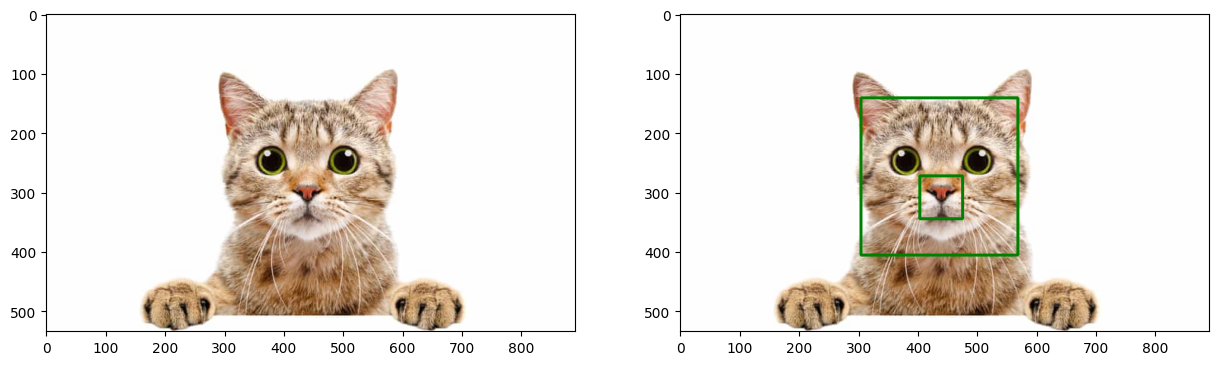

In [49]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK_2023/Week12/new/haarcascade_frontalcatface_extended.xml')
data = ['/content/drive/MyDrive/PCVK_2023/Week12/new/kucing.jpg']

for i in data:
  image = cv.imread(i)
  image_ori = cv.imread(i)
  roi_wajah = cascade_wajah.detectMultiScale(image)
  for(x,y,w,h) in roi_wajah:
    cv.rectangle(image,(x,y),(x+w,y+h),(0,128,0),3)
  f, axarr = plt. subplots(1,2,figsize=(15,5))
  plt.subplot(121),plt.imshow(cv.cvtColor(image_ori, cv.COLOR_BGR2RGB))
  axarr[0].imshow(cv.cvtColor(image_ori, cv.COLOR_BGR2RGB))
  plt.subplot(122),plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
  axarr[1].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
  plt.show()

4. Cobakan juga untuk eyes detection.

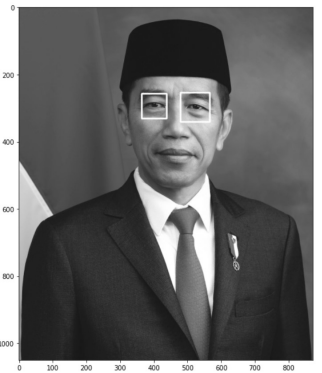

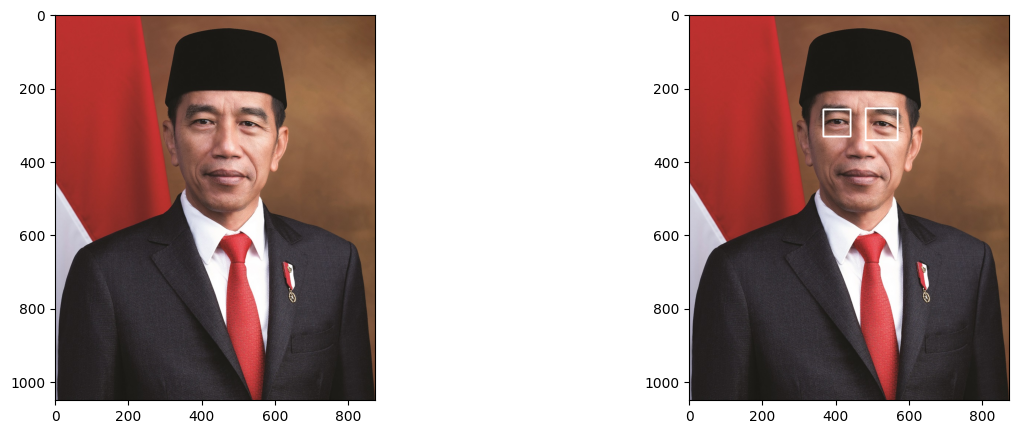

In [53]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK_2023/Week12/new/haarcascade_eye.xml')
data = ['/content/drive/MyDrive/PCVK_2023/Week12/new/jokowi.jpg']

for i in data:
  image = cv.imread(i)
  image_ori = cv.imread(i)
  roi_wajah = cascade_wajah.detectMultiScale(image)
  for(x,y,w,h) in roi_wajah:
    cv.rectangle(image,(x,y),(x+w,y+h),(255,255,255),3)
  f, axarr = plt. subplots(1,2,figsize=(15,5))
  plt.subplot(121),plt.imshow(cv.cvtColor(image_ori, cv.COLOR_BGR2RGB))
  axarr[0].imshow(cv.cvtColor(image_ori, cv.COLOR_BGR2RGB))
  plt.subplot(122),plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
  axarr[1].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
  plt.show()

5. Lakukan Face Tracking menggunakan Google Colab. Petunjuk, Tutorial selengkapnya tentang akses kamera dan FaceDetection pada google colab dapat dilihat di link berikut: https://www.youtube.com/watch?v=YjWh7QvVH60


6. Lakukan Blurring pada bagian wajah yang terdeteksi. Berikut contoh keluarannya.

Petunjuk: anda dapat menggunakan cv.medianBlur untuk melakukan Blurring

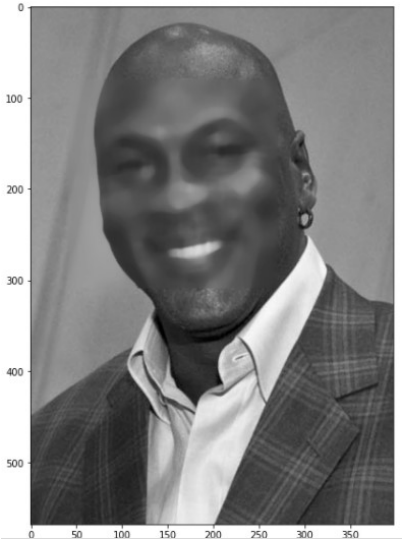

7. Lakukan segmentasi karakter pada KTP seperti gambar berikut

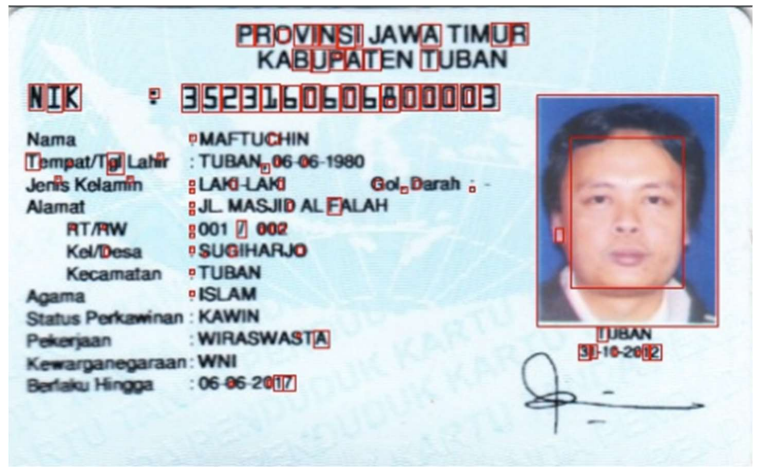

8. Lakukan cropping pada bagian NIK saja sehingga muncul hasil sebagai berikut

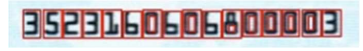